# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure are analyzed. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.


In [23]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, the data are explored through visualizations and code to understand how each feature is related to the others. A statistical description of the dataset, the relevance of each feature are observed and a few sample data points from the dataset are tracked through the course of this project.

The dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**.

In [24]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, three random indices sampled from the data will represent the customers to track.

In [25]:
# Three random indices are sampled from the dataset
indices = [0, 380, 418]

# DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,28257,944,2146,3881,600,270
2,660,8494,18622,133,6740,776


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** On comparing the total purchase cost of each product category for the sample customers with respective mean values, it can be assumed that
- The first customer may be from market, as the total purchase cost of all products excluding frozen products are higher or closer to the respective mean values.
- The second customer may be from restaurant, as the total purchase cost of fresh and frozen products are higher than the respective mean values.
- The third customer may be from cafe, as the total purchase cost of milk and grocery are higher than the respective mean values. Also, the purchase cost of detergents paper is higher than the mean value, as the cafe may require more detergents paper.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? this can be determined quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [26]:
# Make a copy of the DataFrame, and dropping the 'Detergents_Paper' feature
new_data = data.drop(['Detergents_Paper'], axis=1)

# Split the data into training and testing sets(0.25) using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, pd.DataFrame(data.Detergents_Paper), test_size=0.25, random_state=0)

# Fitting a decision tree regressor to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

# Predicting score using the testing set
score = regressor.score(X_test, y_test)
score

0.72865518125414541

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** I tried predicting every feature, in that `Detergents_Paper`, which resulted in the prediction score of 0.72 is the highest. Hence, this feature may not be necessary for identifying customer's spending habits. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If the feature, we attempted to predict above, is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

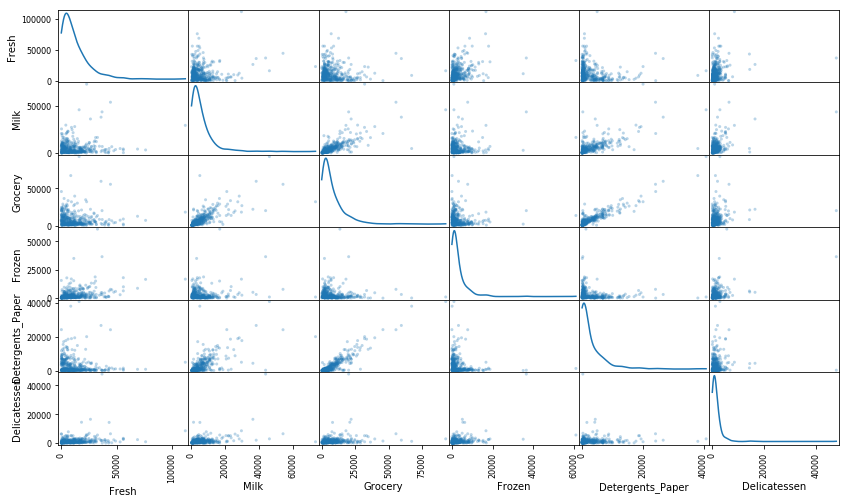

In [27]:
# Scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

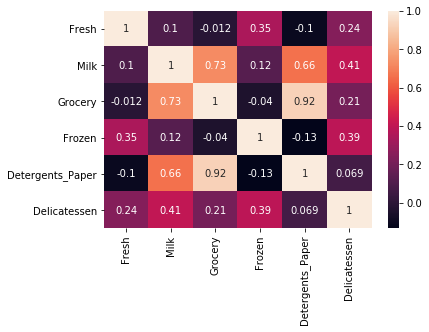

In [28]:
#Feature correlations
import seaborn

seaborn.heatmap(data.corr(), annot = True)

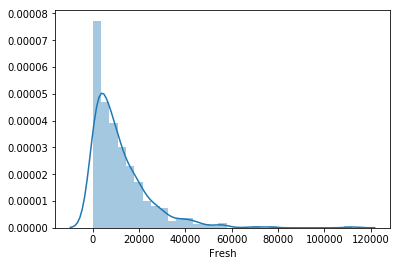

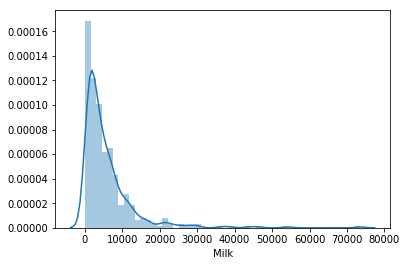

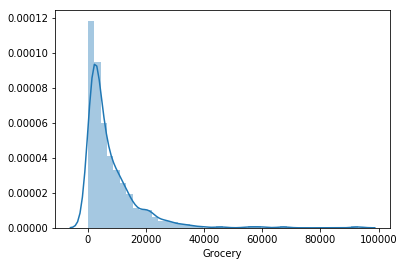

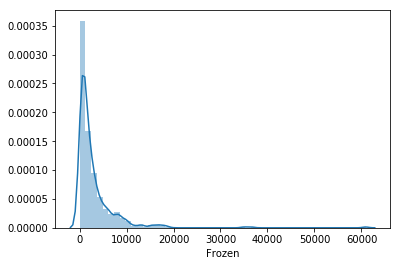

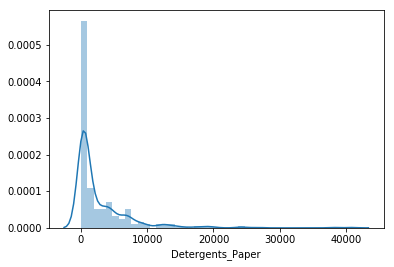

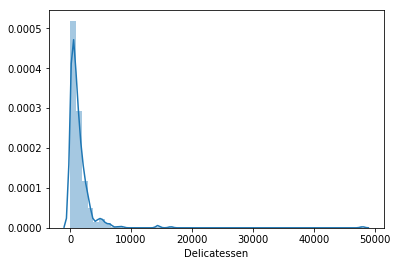

In [29]:
#Visualizing the dataset distribution
import matplotlib.pyplot as plt

for x in data.keys():
    plt.figure()
    seaborn.distplot(data[x], axlabel = x)

In [30]:
# Normlaity test (Shapiro-Wilk test)
# Reference: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
from scipy.stats import shapiro

alpha = 0.05
for x in data.keys():
    stat, p = shapiro(data[x])
    print("\033[1m"+ x + ':\033[0m')
    print('Statistics=%.3f, p=%.6f' % (stat, p))
    if p > alpha:
        print('Sample looks Gaussian\n')
    else:
        print('Sample does not look Gaussian\n')

Fresh:
Statistics=0.781, p=0.000000
Sample does not look Gaussian

Milk:
Statistics=0.628, p=0.000000
Sample does not look Gaussian

Grocery:
Statistics=0.676, p=0.000000
Sample does not look Gaussian

Frozen:
Statistics=0.528, p=0.000000
Sample does not look Gaussian

Detergents_Paper:
Statistics=0.605, p=0.000000
Sample does not look Gaussian

Delicatessen:
Statistics=0.361, p=0.000000
Sample does not look Gaussian



### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:** From the scatter matrix, it can be perceived that `Milk & Grocery`, `Milk & Detergents_Paper`, `Grocery & Detergents_Paper` show a relationship approximately in a linear fashion. To confirm this, I've plotted a heatmap with correlation value of the features and it is evident that `Detergents_Paper and Grocery` exhibits a high correlation with a value of 0.92, next to this comes `Milk and Grocery` and `Milk and Detergents_Papper`. Thus, it confirms the relevance of the feature I attempted to predict. In order to understand the distribution of dataset of all the features, I've plotted the histogram of the dataset for all the features, from which it can be observed that the distribution of dataset for all the features are `Skewed right`, where mean > median. It is further confirmed by the normality test, Shapiro-Wilk test. Based on the p-value, the test proved that the dataset of all features are not normally distributed, which may be due to the presence of many outliers. Therefore, the data need preprocessing to create better representation.

## Data Preprocessing
Creating a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results from the analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

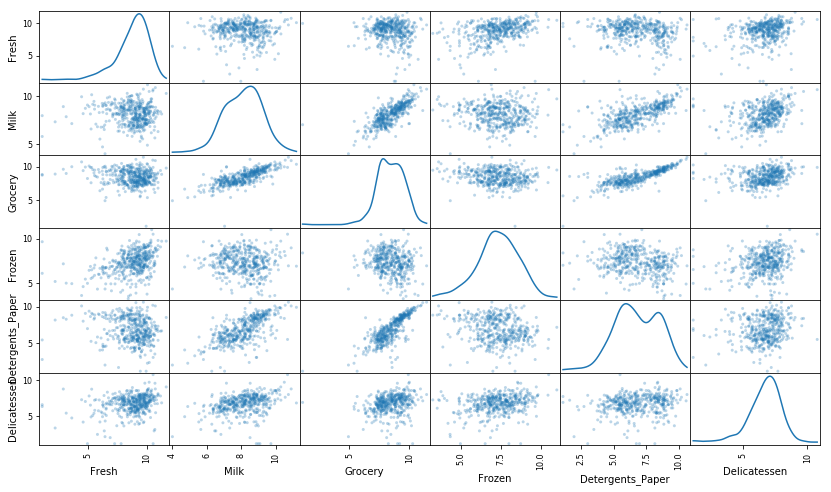

In [31]:
# Data scaling using the natural logarithm
log_data = np.log(data)

# Scaling the sample data using the natural logarithm
log_samples = np.log(samples)

# Scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature is much more normal.

In [32]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,10.249096,6.850126,7.671361,8.263848,6.396930,5.598422
2,6.492240,9.047115,9.832099,4.890349,8.815815,6.654153


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [45]:

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = [66, 95, 128, 338, 154, 356, 75, 161, 109, 142, 187, 233]

# Outliers removal
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** 
- There are five data pints, [154, 65, 66, 128, 75] that are considered outliers for more than one feature.
- I think these data points should not be removed only due to the fact that it is predicted as outliers by Tukey's method for more than one feature in the dataset. It may contain critical information and even a small change may matter a lot and may change the entire result. In general, outliers exist due to incorrectly entered or measured data [[Ref]](https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/). It should only be removed, if they are either demonstrable data entry errors or else physically impossible. Otherwise, methods have to be adjusted, not the data [[Ref]](https://www.quora.com/What-is-a-good-criterion-for-removing-outliers/answer/Peter-Flom). In the given dataset, it is not definite which datapoints are incorrectly entered. But, I assume that since the purchase is from the wholesale distributor, the monetary unit will not be in single digit. Therefore, from the list of predicted outliers, [66, 95, 128, 338, 154, 356, 75, 161, 109, 142, 187, 233] these data points contain single digit monetary unit purchase. Hence, I'm dropping these datapoints. Moreover, this list contains four datapoints from the outliers list that are predicted for more than one feature.
- Outliers have great effect in K-means result. As this algorithm calculates the centroid of the cluster based on the mean value of the datapoints in the cluster, it is very sensitive to outliers. Therefore, either the outliers should be removed after careful analysis of data, to ensure no loss of critical information or K-medians should be used, which is less sensitive to outliers.

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

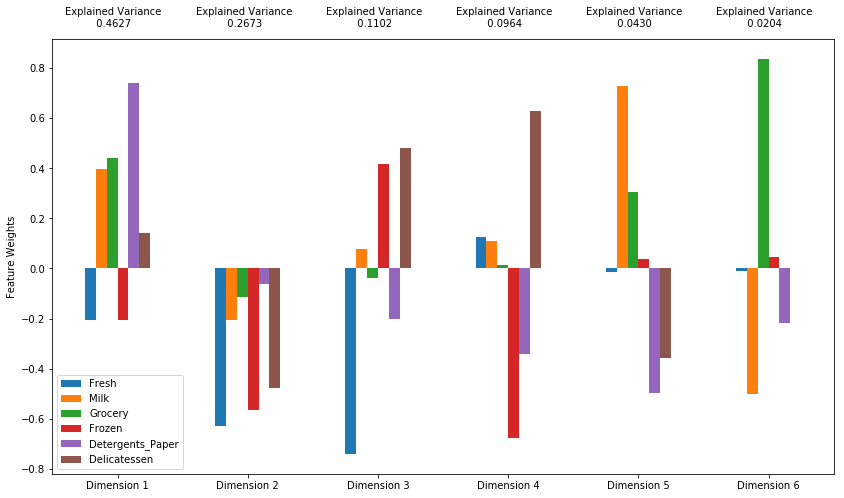

In [34]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** 
- The first and second principal component explains the total variance of 0.73. 
- The first four principal components explain the total variance of 0.9366.
- From the visualization,
    - The first principal component is best represented by three features, Milk, Grocery and Detergents_Paper. All these exhibit high positive variance, in which Detergents_paper shows the highest. 
    - The second principal component is best represented by Fresh, Frozen and Delicatessen. All these features exhibit high negative variance with Fresh being the highest. 
    - The third principal component is best represented by Fresh, with highest variance (-ve), Frozen and Delicatessen with high positive variance.
    - The fourth principal component has the highest variance (-ve) in Frozen. Next to it comes the Delicatessen with higher positive variance and finally the Detergents_Paper with high negative variance.

### Observation
Checking how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [35]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7071,0.1445,-1.2270,1.4527,0.1286,-0.4538
1,-1.8572,-0.5173,-1.2051,-1.1817,-0.5301,0.1044
2,3.3636,2.3929,0.2705,0.7415,0.0612,0.1664


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [36]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [37]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7071,0.1445
1,-1.8572,-0.5173
2,3.3636,2.3929


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

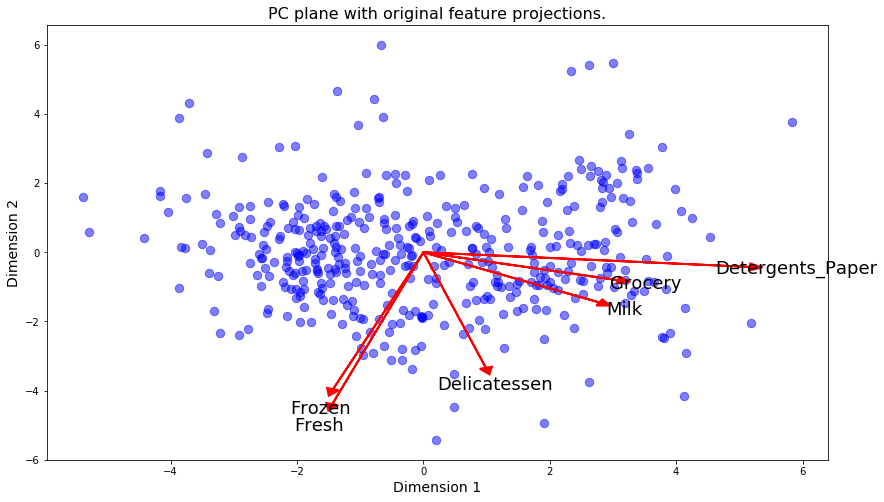

In [38]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm can be used to identify the various customer segments hidden in the data. Then, specific data points from the clusters are recovered to understand their significance by transforming them back into their original dimension and scale.

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

**Advantages of K-Means clustering**
- It is faster, robust and computationally efficient.
- It gives the best result, when the dataset are separated from each other and non-uniform.

**Advantages of GMM clustering**
- Unlike K-Means, which is a hard clustering model, GMM is a soft clustering model, where each data point will have the membership probability to all clusters.
- It doesn't assume cluster to be of any geometry and hence it works very well with uniform distribution of dataset.

From the above biplot, it can be observed that the distribution of data is almost uniform and the data points will overlap with more than one cluster. Therefore, soft clustering model like Gaussian Mixture Model would be more appropriate fo this problem.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In [39]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

clusters_no = [2, 3, 4, 5, 6]

for n in clusters_no:
    # Applying Gaussian Mixture Model to the reduced data 
    clusterer = GMM(n_components=n).fit(reduced_data)

    # Predicting the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Finding the cluster centers
    centers = clusterer.means_

    # Predicting the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculating the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print("The Silhouette_score for " + str(n) + " clusters is " + str(score))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

The Silhouette_score for 2 clusters is 0.427279334424
The Silhouette_score for 3 clusters is 0.399245758866
The Silhouette_score for 4 clusters is 0.312101354457
The Silhouette_score for 5 clusters is 0.286384567387
The Silhouette_score for 6 clusters is 0.319146853364


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWa

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** 

- The Silhouette_score for 2 clusters is 0.427279334424
- The Silhouette_score for 3 clusters is 0.399245758866
- The Silhouette_score for 4 clusters is 0.312101354457
- The Silhouette_score for 5 clusters is 0.286384567387
- The Silhouette_score for 6 clusters is 0.319146853364

Model with 2 clusters has the best silhouette_score.

### Cluster Visualization
Once the optimal number of clusters for the clustering algorithm is chosen using the scoring metric above, we can now visualize the results by executing the code block below.

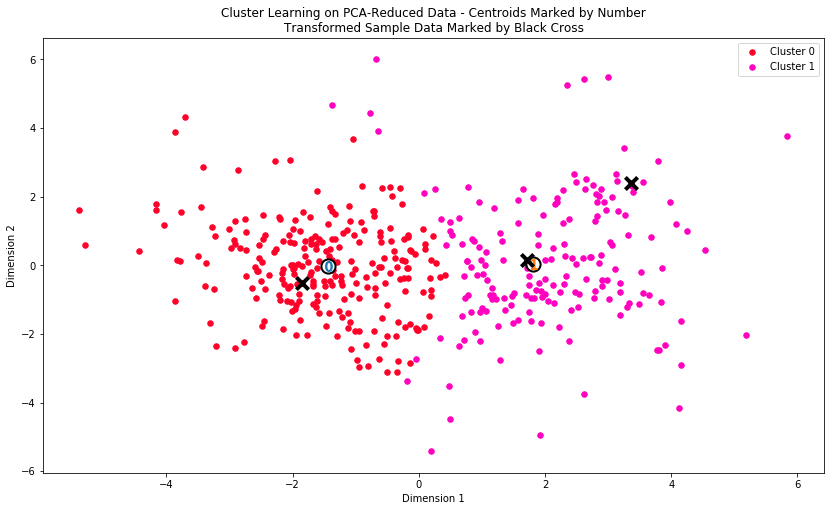

In [41]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [52]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9084.0,1950.0,2543.0,2051.0,327.0,706.0
Segment 1,4412.0,6994.0,10536.0,1007.0,3588.0,1074.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:** Since mean is sensitive to outliers, comparing median of the dataset with the total purchase cost of each product category for the representative data points would be more appropriate.

- In Segment 0, the total purchase cost of Fresh and Frozen products are higher than the respective median values. Thus, this segment may represent restaurant. On the other hand, the values of all these features are lower than the respective mean values. Hence, it is difficult to represent the establishment, on comparing with mean values.
- In Segment 1, the total purchase cost of Milk, Grocery, Delicatessen and Detergents_Paper are higher than the respective median values. Thus, this segment may represent market. Moreover, same features exhibit values higher than the respective mean values. Thus, for this segment, comparing the total purchase cost with both mean and median values results in same establishment. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [43]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** 
- Sample point 2 and 0 belong to cluster 1, which represents market. My previous assumption on sample point 0 establishment is correct. Whereas, I've assumed sample point 2 to be of cafe but it is predicted as market.
- Sample point 1 is predicted to be in cluster 0, which represents restaurant. This prediction is same as my assumption.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Using A/B tests, the wholesale distributor can determine whether the change in delivery service from 5 days a week to 3 days a week would impact the customer positively or not. For this, the test has to be carried out for both the segments separately. The steps for A/B test are as follows
- Take some sample data points that are close to the cluster center. 
- Split those data points into two equal half.
- For the first half, get the customer feedback for 3 days a week delivery service and for the second half, get the customer feedback for 5 days a week delivery service.
- Analyze the feedback to determine whether the customers react positively or not and assign the delivery frequency accordingly. The result of these samples can be considered as a representative for the entire cluster.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The wholesale distributor can train the supervised learning algorithms like logistic regression, Neural Network, SVM, Decision trees on the customer dataset with input features as annual spending on each product category and the customer segment data as labels, to label new customers. As there are two segments/labels, it will be a binary classification problem. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

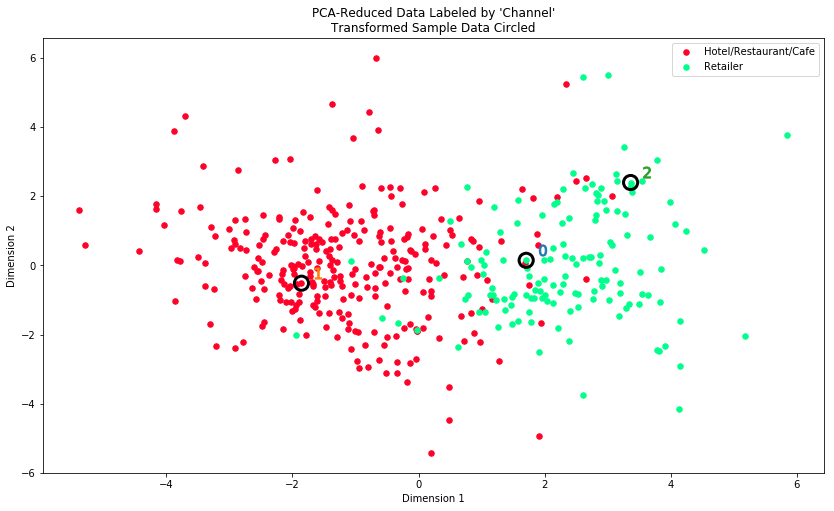

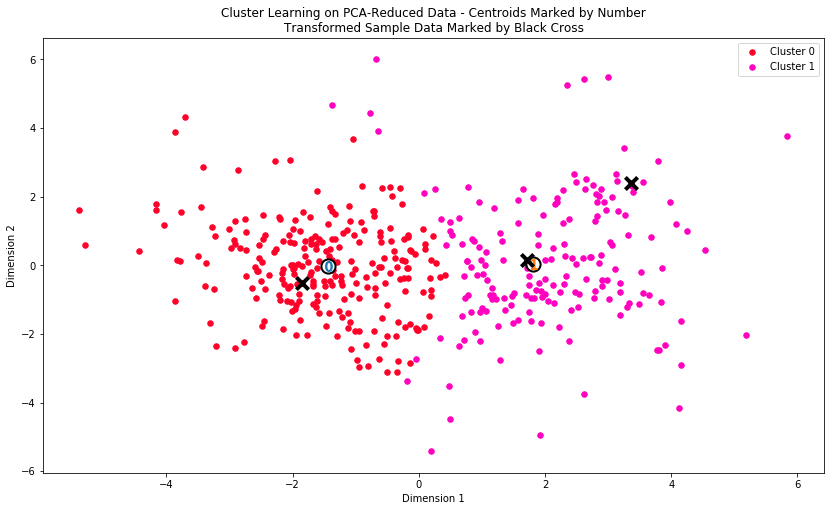

In [44]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:** 
- The 2 clusters I chose almost matches with the clusters of customer channel data. Cluster 0 aligns with Hotel/Restaurant/Cafe customers, whereas cluster 1 aligns with Retailer customers.
- In the above plot, customer segments on the extreme right would be classified as purely 'Retailer', whereas on the exrteme left, it would be classified as purely 'Home/Restaurant/Cafe'
- I've guessed cluster 0 to be restaurant and it is consistent with the underlying distribution. For cluster 1, I assumed market. In channel data, it is labeled as Retailer. Moreover, the market is similar to retailer. Hence, it is also consistent with my previous definition of customer segment.